# Data Analytics Presentation - Short Demo - Susana Reyes

### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
import pandas_profiling

### Import File

In [2]:
#Import CSV file
Data = pd.read_csv('credit_clean.csv')

### Describe Data

In [3]:
#Sample of Data (# of rows)
Data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
#Variables types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
#describe the data - basic stats
Data.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Pandas Profiling

In [6]:
#profile = pandas_profiling.ProfileReport(Data)
#profile.to_file("credit.html")

#takes about 2-3 minutes to run
#Can be saved as a local file or as a website

#https://susanareyes1.github.io/CourseWork/credit.html

### Correlation Matrix

In [7]:
corr_mat = Data.corr()
print(corr_mat)

                 ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0     PAY_2  \
ID         1.000000   0.026179 -0.029079  0.018678 -0.030575 -0.011215   
LIMIT_BAL  0.026179   1.000000 -0.108139  0.144713 -0.271214 -0.296382   
MARRIAGE  -0.029079  -0.108139  1.000000 -0.414170  0.019917  0.024199   
AGE        0.018678   0.144713 -0.414170  1.000000 -0.039447 -0.050148   
PAY_0     -0.030575  -0.271214  0.019917 -0.039447  1.000000  0.672164   
PAY_2     -0.011215  -0.296382  0.024199 -0.050148  0.672164  1.000000   
PAY_3     -0.018494  -0.286123  0.032688 -0.053048  0.574245  0.766552   
PAY_4     -0.002735  -0.267460  0.033122 -0.049722  0.538841  0.662067   
PAY_5     -0.022199  -0.249411  0.035629 -0.053826  0.509426  0.622780   
PAY_6     -0.020270  -0.235195  0.034345 -0.048773  0.474553  0.575501   
BILL_AMT1  0.019389   0.285430 -0.023472  0.056239  0.187068  0.234887   
BILL_AMT2  0.017982   0.278314 -0.021602  0.054283  0.189859  0.235257   
BILL_AMT3  0.024354   0.283236 -0.0249

### Pair Plot

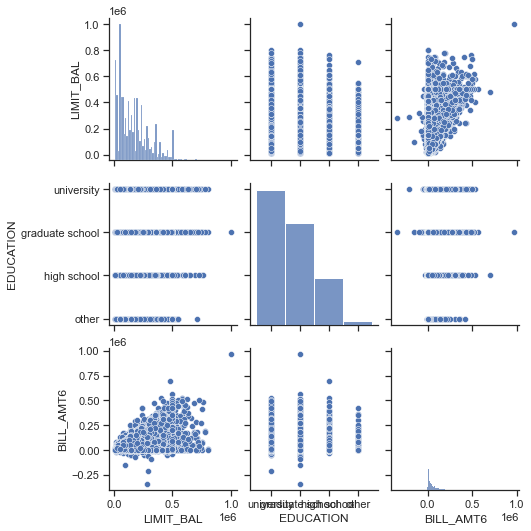

In [10]:
sns.set(style="ticks", color_codes=True)
pairplot1 = sns.pairplot(Data, vars=['LIMIT_BAL','EDUCATION','BILL_AMT6'])
pairplot1

### Pivots

<AxesSubplot:title={'center':'Marriage and Default Behavior'}, xlabel='Marital Category', ylabel='Count of Customers'>

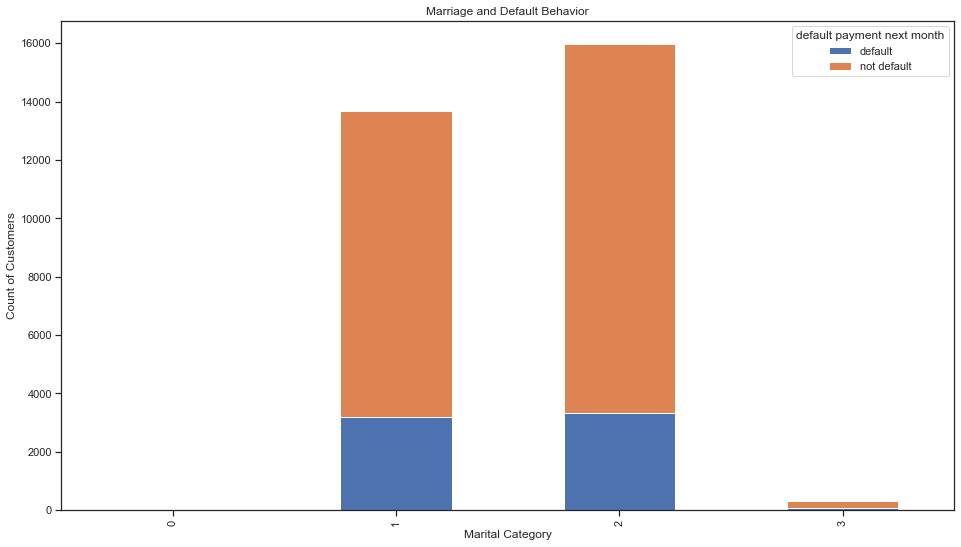

In [11]:
#Pivot Marriage and Default Behavior
pivot_default_marriage = pd.pivot_table(Data,index ='MARRIAGE',columns='default payment next month',values='ID',aggfunc='count',fill_value=0)
pivot_default_marriage.plot.bar(figsize=(16,9), title='Marriage and Default Behavior', xlabel='Marital Category', ylabel='Count of Customers', stacked=True)


<AxesSubplot:title={'center':'Education and Default Behavior'}, xlabel='Education Category', ylabel='Count of Customers'>

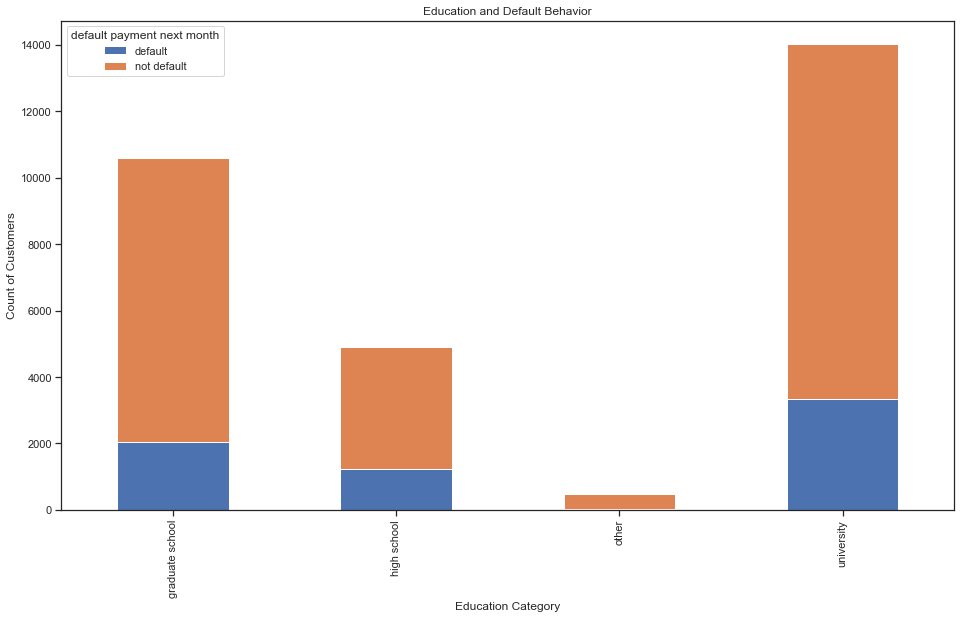

In [12]:
#Pivot Education and Default Behavior
pivot_default_edu = pd.pivot_table(Data,index ='EDUCATION',columns='default payment next month',values='ID',aggfunc='count',fill_value=0)
pivot_default_edu.plot.bar(figsize=(16,9), title='Education and Default Behavior', xlabel='Education Category', ylabel='Count of Customers', stacked=True)


### Count Plot

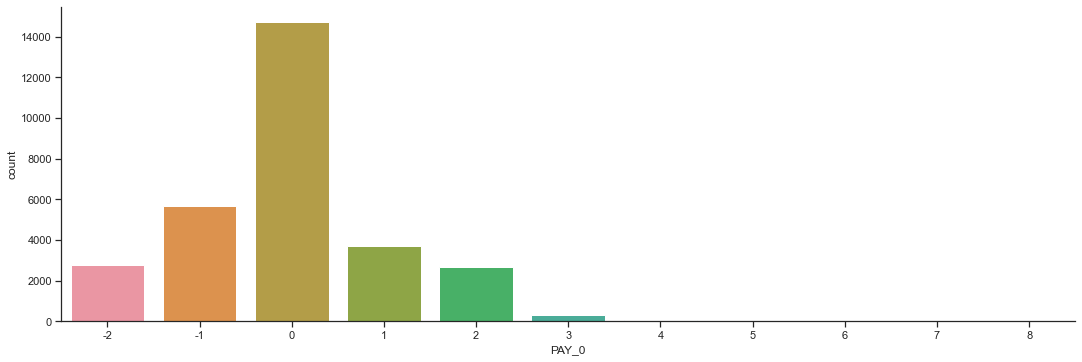

In [13]:
#Distribuition of PAY_0
#The measurement scale for the repayment status is:
# -2 = No consumption
# -1 = Paid in full
# 0 = The use of revolving credit
# 1 = payment delay for one month 
# 2 = payment delay for two months
# 8 = payment delay for eight months
# 9 = payment delay for nine months and above.

fg1 = sns.catplot(x='PAY_0', data=Data,  kind='count', aspect=3)
fg1.set_xlabels('PAY_0')

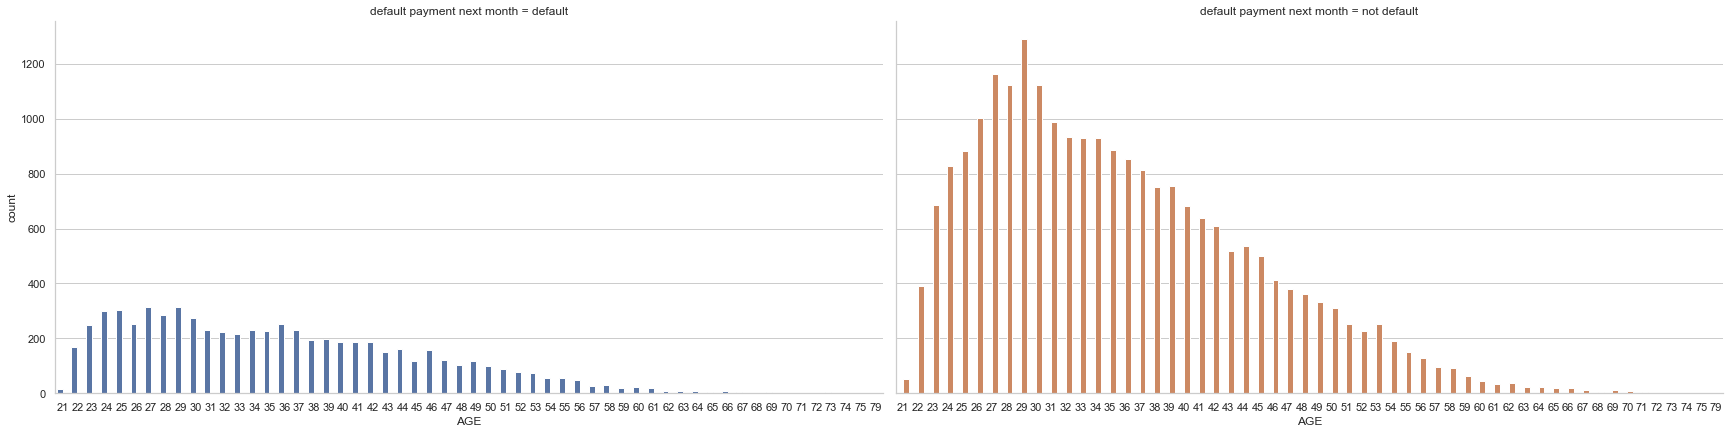

In [20]:
#Plot Age and In-Store
sns.catplot(x="AGE", hue="default payment next month", col="default payment next month",

                data=Data, kind="count",

                height=6, aspect=2);

### Box Plot 

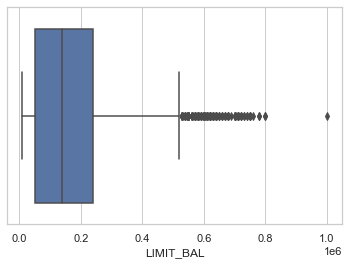

In [15]:
sns.set_theme(style="whitegrid")
boxplot1 = sns.boxplot(x=Data["LIMIT_BAL"])